각 Optimizer를 활용하여 MNIST 데이터 학습시 최적화를 수행하는 프로그램을 구현

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)


c:\Users\USER\ms-deep-learning\deep-learning\notebooks\deep-learning-basic\ch05-optimization
c:\Users\USER\ms-deep-learning\deep-learning\notebooks\deep-learning-basic


============== iteration: 0=======================
SGD:2.4599006345991032
Momentum:2.2513596765345527
AdaGrad:2.7726947912056907
Adam:2.163238266167074
============== iteration: 100=======================
SGD:1.6300427095081584
Momentum:0.40967396867247646
AdaGrad:0.19178740934448435
Adam:0.2539619917588044
============== iteration: 200=======================
SGD:0.7876696256973137
Momentum:0.2083847714593798
AdaGrad:0.11452666435647632
Adam:0.15922618358420546
============== iteration: 300=======================
SGD:0.4658279524691584
Momentum:0.1327992887381113
AdaGrad:0.042713158623144044
Adam:0.058492489456738975
============== iteration: 400=======================
SGD:0.4393026423817059
Momentum:0.18836758497474457
AdaGrad:0.12085415929177512
Adam:0.14373809543002136
============== iteration: 500=======================
SGD:0.38867229842527506
Momentum:0.11168611390091786
AdaGrad:0.04613983254162121
Adam:0.05907638300774208
============== iteration: 600=======================
SGD:0

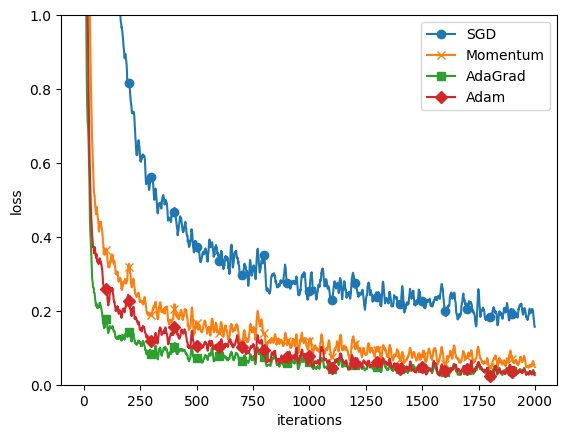

In [4]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

# 1. mnist 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000 # 빠르게 보기 위해서

# 2. 실험용 설정
## 비교할 손실 함수 정의 
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam() # 일반적으로 가장 성능이 좋다
# optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():  # 손실함수마다 측정
    networks[key] = MultiLayerNet(
        input_size = 784,
        hidden_size_list = [100, 100, 100, 100],    #히든층 4개
        output_size=10 
    )
    train_loss[key] = []

# 3. 훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print('============== iteration: ' + str(i) + "=======================")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 4. 그래프 그리기 
markers = {"SGD": "o", "Momentum": "x", "AdaGrad" : "s", "Adam":"D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker = markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0,1)
plt.legend()
plt.show()